## SIT 789 Task-2.3D

In [1]:
import numpy as np
import cv2 as cv
import math
from matplotlib import pyplot as plt

Step-1 Load file and binarise the image

In [2]:
doc = cv.imread('doc.jpg', 0) #Note that the second parameter of imread is set to 0
threshold = 200
ret, doc_bin = cv.threshold(doc, threshold, 255, cv.THRESH_BINARY)

Step-2 Get negative version of binarise image

In [3]:
doc_bin = 255 - doc_bin #convert black/white to white/black

Step-3 Extract connected components

In [4]:
# connected component labelling
num_labels, labels_im = cv.connectedComponents(doc_bin)

In [5]:
def ExtractConnectedComponents(num_labels, labels_im):
    connected_components = [[] for i in range(0, num_labels)]
    height, width = labels_im.shape
    for i in range(0, height):
        for j in range(0, width):
            if labels_im[i, j] >= 0:
                connected_components[labels_im[i, j]].append((j, i))
    return connected_components

In [6]:
connected_components = ExtractConnectedComponents(num_labels, labels_im)

Function for strategy - c

In [7]:
def get_ycordinate_based_candidate(connected_components):
    candidate_points = []
    for x in connected_components:
        res = max(x, key = lambda i : i[0])
        candidate_points.append([res[0], res[1]])
    return candidate_points

Function for strategy - b

In [8]:
def get_mean_based_candidate(connected_components):
    candidate_points = []
    for x in connected_components:
        res = [round(sum(ele) / len(x)) for ele in zip(*x)]
        candidate_points.append(res)
    return candidate_points

In [9]:
def split_candidate_points(computed_candidate_points):
    candidate_points_x = []
    candidate_points_y = []
    for k in computed_candidate_points:
        candidate_points_x.append(k[0])
        candidate_points_y.append(k[1])
    return candidate_points_x, candidate_points_y

Filter image to remove non candidate points

In [10]:
def filter_image(image_data, x_points, y_points):  
    height, width = image_data.shape
    blank_image = np.zeros((height, width), np.uint8)
    
    for i in range(0,len(x_points)):
        x = x_points[i]
        y = y_points[i]
        blank_image[y][x] = 255
    return blank_image

In [11]:
import math, statistics, time
distance_resolution = 1
angular_resolution = np.pi/180
density_threshold = 10

Hough Transform

In [12]:
def get_angles_from_hough_transform(image_data):
    lines = cv.HoughLines(np.array(image_data), distance_resolution, angular_resolution, density_threshold)
    detected_angle = []
    for line in lines:
        distance, angle = line[0]
        detected_angle.append(angle)
    return detected_angle

In [13]:
def get_median_angle(detected_angles):
    return statistics.median(detected_angles)

As the angle returned by cv.HoughLines is orthogonal to the connected components we need to subtract 90 degree from it

In [14]:
def deskew_image(median_angle, image_data):
    # rotate image
    height, width = image_data.shape
    c_x = (width - 1) / 2.0 # column index varies in [0, width-1]
    c_y = (height - 1) / 2.0 # row index varies in [0, height-1]
    c = (c_x, c_y) # A point is defined by x and y coordinate
    M = cv.getRotationMatrix2D(c, median_angle * 180 / math.pi - 90, 1)
    doc_deskewed = cv.warpAffine(image_data, M, (width, height))
    plt.imshow(doc_deskewed, "gray")

Strategy - A

Time for execution of strategy 1.0785117149353027


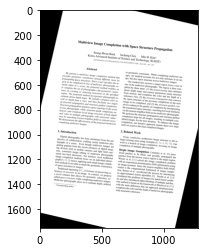

In [15]:
start_time = time.time()
strategy_a_image = doc_bin.copy()
plt.imshow(strategy_a_image, 'gray')
cv.imwrite('doc_strategy_a_image.png', strategy_a_image)
detected_angles = get_angles_from_hough_transform(strategy_a_image)
median_angle = get_median_angle(detected_angles)
deskew_image(median_angle, doc)
print("Time for execution of strategy", time.time() - start_time)

In [16]:
median_angle

1.3439035415649414

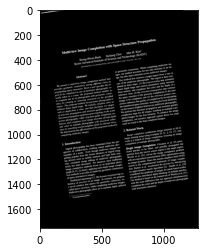

In [17]:
plt.imshow(strategy_a_image, 'gray')

Strategy - B

Time for execution of strategy 3.4452805519104004


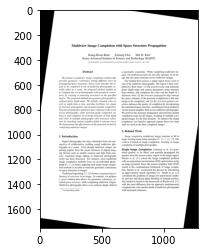

In [34]:
start_time = time.time()
mean_based_candidate_points = get_mean_based_candidate(connected_components)
x_points, y_points = split_candidate_points(mean_based_candidate_points)
strategy_b_image = doc.copy()
strategy_b_image = filter_image(strategy_b_image, x_points, y_points)
detected_angles = get_angles_from_hough_transform(strategy_b_image)
median_angle = get_median_angle(detected_angles)
deskew_image(median_angle, doc)
print("Time for execution of strategy", time.time() - start_time)

In [35]:
median_angle

1.4311699867248535

True

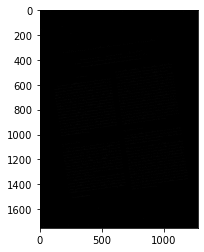

In [37]:
plt.imshow(strategy_b_image, 'gray')
cv.imwrite('doc_strategy_b_image.png', strategy_b_image)

Strategy - C

Time for execution of strategy 1.2488694190979004


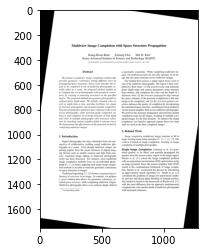

In [21]:
start_time = time.time()
max_y_based_candidate_points = get_ycordinate_based_candidate(connected_components)
x_points, y_points = split_candidate_points(max_y_based_candidate_points)
strategy_c_image = doc.copy()
strategy_c_image = filter_image(strategy_c_image, x_points, y_points)
detected_angles = get_angles_from_hough_transform(strategy_c_image)
median_angle = get_median_angle(detected_angles)
deskew_image(median_angle, doc)
print("Time for execution of strategy", time.time() - start_time)

True

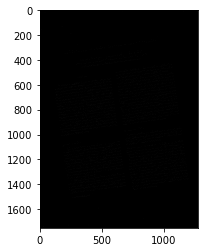

In [22]:
plt.imshow(strategy_c_image, 'gray')
cv.imwrite('doc_strategy_c_image.png', strategy_c_image)

In [23]:
median_angle

1.43117

Another test case - doc_1.jpg

As the input image is already rotated by 90 degree clockwise, to deskew the image threshold has to be set to THRESH_BINARY_INV i.e. intensity of the pixel src(x,y) is higher than thresh, then the new pixel intensity is set to a 0. Otherwise, it is set to MaxVal.

In [24]:
doc_1 = cv.imread('doc_1.jpg', 0) #Note that the second parameter of imread is set to 0
threshold = 200
ret, doc_bin_1 = cv.threshold(doc_1, threshold, 255, cv.THRESH_BINARY_INV)
doc_bin_1 = 255 - doc_bin_1 #convert black/white to white/black

In [25]:
# connected component labelling
num_labels_1, labels_im_1 = cv.connectedComponents(doc_bin_1)
connected_components_1 = ExtractConnectedComponents(num_labels_1, labels_im_1)

Strategy - A

Time for execution of strategy 4.210788011550903


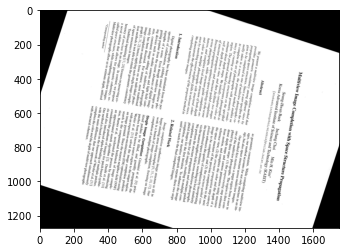

In [26]:
start_time = time.time()
strategy_a_image = doc_bin_1.copy()
detected_angles = get_angles_from_hough_transform(strategy_a_image)
median_angle = get_median_angle(detected_angles)
deskew_image(median_angle, doc_1)
print("Time for execution of strategy", time.time() - start_time)

True

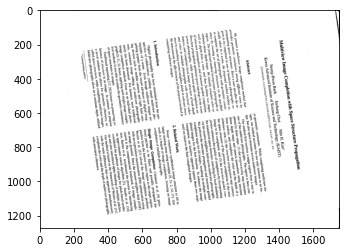

In [27]:
plt.imshow(doc_bin_1, 'gray')
cv.imwrite('doc_1_strategy_a_image.png', strategy_a_image)

In [28]:
median_angle

1.2566371

Strategy - B

Time for execution of strategy 4.218300104141235


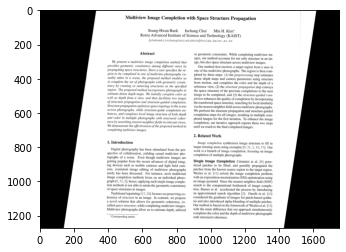

In [29]:
start_time = time.time()
mean_based_candidate_points = get_mean_based_candidate(connected_components_1)
x_points, y_points = split_candidate_points(mean_based_candidate_points)
strategy_b_image = doc_1.copy()
strategy_b_image = filter_image(strategy_b_image, x_points, y_points)
detected_angles = get_angles_from_hough_transform(strategy_b_image)
median_angle = get_median_angle(detected_angles)
deskew_image(median_angle, doc_1)
print("Time for execution of strategy", time.time() - start_time)

In [30]:
median_angle

2.993239641189575

True

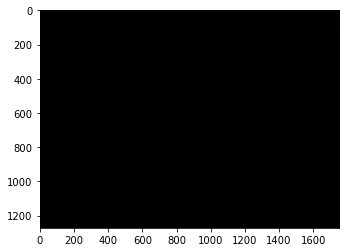

In [31]:
plt.imshow(strategy_b_image, 'gray')
cv.imwrite('doc_1_strategy_b_image.png', strategy_b_image)

Strategy - C

Time for execution of strategy 1.7321479320526123


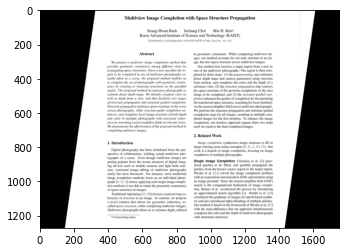

In [38]:
start_time = time.time()
max_y_based_candidate_points = get_ycordinate_based_candidate(connected_components_1)
x_points, y_points = split_candidate_points(max_y_based_candidate_points)
strategy_c_image = doc_1.copy()
strategy_c_image = filter_image(strategy_c_image, x_points, y_points)
detected_angles = get_angles_from_hough_transform(strategy_c_image)
median_angle = get_median_angle(detected_angles)
deskew_image(median_angle, doc_1)
print("Time for execution of strategy", time.time() - start_time)

In [33]:
median_angle

3.0019662

True

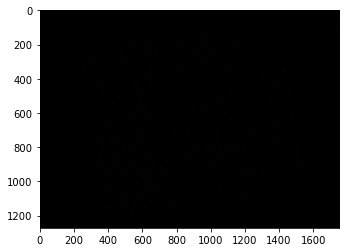

In [39]:
plt.imshow(strategy_c_image, 'gray')
cv.imwrite('doc_1_strategy_c_image.png', strategy_c_image)